# Questions from lesson 4

In this question we are going to be using a dataset of some of the largest public companies in the EU. The data was collected on 30th July 2020.

In [17]:
import pandas as pd

In [18]:
stocks = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/stocks.csv")
stocks

,Name,Ticker,Beta,Market Cap,P/E
0,Volkswagen AG,VOW3,1.53,73208310000,6.37
1,Allianz SE,ALV,0.96,76935020000,10.00
2,Banco Santander SA,BNC,1.51,34939590000,6.91
3,Daimler AG,DAI,1.56,42606280000,109.23
4,Bayerische Motoren Werke AG,BMW,1.30,38606110000,7.82
5,Siemens AG,SIE,1.21,96934000000,17.64
6,Enel SpA,ENEL,0.68,80316770000,37.30
7,ASTRAZENECA PLC,AZN,0.55,113735000000,93.16
8,SAP SE,SAP,0.95,169239000000,38.39
9,GLAXOSMITHKLINE PLC,GSK,0.70,103701000000,15.24


**Question 1:**

*Calculate Mean, Median and IQR*

In [19]:
stocks["Beta"].mean()

0.703529411764706

In [20]:
stocks["Beta"].median()

0.89

In [21]:
Q1 = stocks["Beta"].quantile(0.25)
Q3 = stocks["Beta"].quantile(0.75)

IQR = Q3 - Q1
IQR

0.6599999999999999

**Question 2:**

*Manually calculate the population standard deviation and find the sample standard deviation. Why is sample standard deviation always larger than the population standard deviation?*

In [22]:
betamean = stocks["Beta"].mean()
meandev = stocks["Beta"] - betamean
meandevsqrd = meandev ** 2
variance = meandevsqrd.mean()
stddev = variance ** 0.5
stddev

1.0233275663043957

In [23]:
stocks["Beta"].std()

1.054821911369821

The sample standard deviation is always larger is it is divided by ${n-1}$ whereas population standard deviation is smaller as you divde by the larger ${N}$. 

**Question 3:**

*Remove the outliers from the `stocks["Beta"]` column with the ${1.5*IQR}$ method*

In [24]:
LowerBound = Q1 - 1.5*IQR
UpperBound = Q3 + 1.5*IQR

beta_exout = stocks[(stocks["Beta"] > LowerBound) & (stocks["Beta"] < UpperBound)]
beta_exout

,Name,Ticker,Beta,Market Cap,P/E
0,Volkswagen AG,VOW3,1.53,73208310000,6.37
1,Allianz SE,ALV,0.96,76935020000,10.00
2,Banco Santander SA,BNC,1.51,34939590000,6.91
3,Daimler AG,DAI,1.56,42606280000,109.23
4,Bayerische Motoren Werke AG,BMW,1.30,38606110000,7.82
5,Siemens AG,SIE,1.21,96934000000,17.64
6,Enel SpA,ENEL,0.68,80316770000,37.30
7,ASTRAZENECA PLC,AZN,0.55,113735000000,93.16
8,SAP SE,SAP,0.95,169239000000,38.39
9,GLAXOSMITHKLINE PLC,GSK,0.70,103701000000,15.24


**Question 4:**

*Plot a box plot.* 

*What do the following features mean:*

- *Middle orange line*
- *Box around the orange line*
- *The Whiskers*

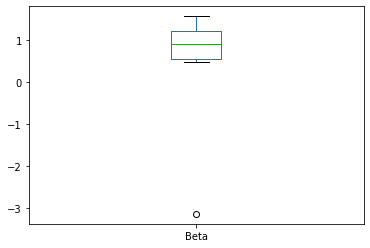

In [27]:
stocks["Beta"].plot.box()

**Question 5:**

Below is some data on the wages and CPI - the consumer purchasing index - in Romainia between 2000-2010. [1]

*Calculate the yearly percentage growth rate in wages and round the result to one decimal place.*

In [43]:
RomaniaCPIWages = pd.read_csv("https://raw.githubusercontent.com/ThomasJewson/datasets/master/CPIWagesInRomania/wage_cpi_yearly.csv")
RomaniaCPIWages

,Year,Wage,CPI
0,2000,217.4,322.9
1,2001,305.3,239.0
2,2002,388.1,194.5
3,2003,486.8,168.6
4,2004,596.5,150.5
5,2005,737.8,138.2
6,2006,862.0,129.6
7,2007,1042.9,123.7
8,2008,1282.3,114.6
9,2009,1381.1,108.6


In [42]:
round(RomaniaCPIWages["Wage"].pct_change()*100,1)

0      NaN
1     40.4
2     27.1
3     25.4
4     22.5
5     23.7
6     16.8
7     21.0
8     23.0
9      7.7
10     1.9
Name: Wage, dtype: float64

Sources:

[1] I. Dolca and M. Nicolov (2013). "Analysis of Relationship Between
Net Wage and Consumer Price Index," Procedia Economics and Finance, Vol. 6,
pp. 738-747.
